##Datasetni import qilamiz va tanishib chiqamiz

In [1]:
import pandas as pd
import numpy as np

In [5]:
url = "https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/refs/heads/main/diabetes.csv"
df = pd.read_csv(url)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


###Vazifa:

Quyidagi ma'lumotlar to'plami Hindistonning Qandli diabet va buyrak kasalliklari milliy institutidan olingan. Maqsad diagnostik o'lchovlar asosida bemorda diabet bor-yo'qligini taxmin qilishdir.


###Tarkib:
Dataset ichida barcha bemorlar kamida 21 yoshli ayollari.

###Ustunlar:

**Pregnancies**: homilador bo'lish soni

**Glucose**: glyukozaga test natijasi

**BloodPressure**: diastolik qon bosimi (mm Hg)

**SkinThickness**: Triceps teri burmasining qalinligi (mm)

**Insulin**: 2 soatlik sarum insulini (mu U/ml)

**BMI**: Tana massasi indeksi (vazn kg / (m bo'yi) ^ 2)

**DiabetesPedigreeFunction**: diabetning naslchilik funktsiyasi

**Age**: Yosh (yil)

**Outcome**: Class (0 - diabet yo'q, 1 - diabet)

In [7]:
df.shape

(768, 9)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [11]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


##Ustunlar bo'yicha korrelyatsiya

In [16]:
corr = df.corr().abs()
corr.style.background_gradient(cmap='coolwarm')
# corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,0.081672,0.073535,0.017683,0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,0.113970,0.074752
Insulin,0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,0.113970,0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [18]:
df.corrwith(df['Outcome']).abs().sort_values(ascending=False)

,0
Outcome,1.000000
Glucose,0.466581
BMI,0.292695
Age,0.238356
Pregnancies,0.221898
DiabetesPedigreeFunction,0.173844
Insulin,0.130548
SkinThickness,0.074752
BloodPressure,0.065068


In [19]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


##Standartizatsiya

In [20]:
X = df.drop("Outcome", axis=1)
y = df['Outcome'].copy()

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X)

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

##Train/Test split

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

##KNN model yaratamiz

In [49]:
## 1-urinish. 1chi urinishda model uchun k qiymat berilmadi
# from sklearn.neighbors import KNeighborsClassifier
# knn = KNeighborsClassifier()
# knn.fit(X_train, y_train)

## 2-urinish. 2chi urinishda modelni baholab eng optimal k qiymatni topganimizdan so'ng yana modellashga qaytdik
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=14)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=14)

In [51]:
y_predict = knn.predict(X_test)

In [52]:
y_predict

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0])

##Baholash

###jaccard_score

In [53]:
from sklearn.metrics import jaccard_score

jaccard_score(y_test, y_predict)

np.float64(0.4411764705882353)

###confusion_matrix

In [54]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_predict)

array([[43,  7],
       [12, 15]])

confusion_matrix visualized

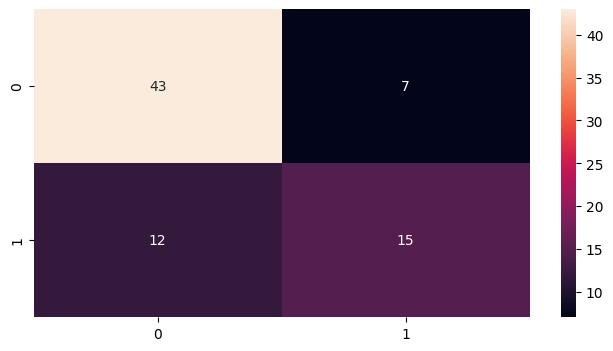

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()

##classification_report

In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82        50
           1       0.68      0.56      0.61        27

    accuracy                           0.75        77
   macro avg       0.73      0.71      0.72        77
weighted avg       0.75      0.75      0.75        77



##Cross validation

In [57]:
from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(estimator=knn, X=X, y=y, cv=5)
print(f"Classification report:\n{classification_report(y, predicted)}")

Classification report:
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       500
           1       0.73      0.49      0.59       268

    accuracy                           0.76       768
   macro avg       0.75      0.70      0.71       768
weighted avg       0.75      0.76      0.74       768



##GridSerachCV yordamida eng optimal k qiymatni aniqlaymiz

In [58]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': np.arange(1,20)}
knn_gscv = GridSearchCV(knn, param_grid, cv=5)
knn_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=14),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [59]:
knn_gscv.best_score_

np.float64(0.7578558696205755)

In [60]:
knn_gscv.best_params_

{'n_neighbors': np.int64(14)}

In [61]:
knn_gscv.cv_results_['rank_test_score']

array([19, 18, 17, 16, 15, 14, 13,  6, 11,  9,  8,  3,  2,  1, 12, 10,  4,
        7,  5], dtype=int32)

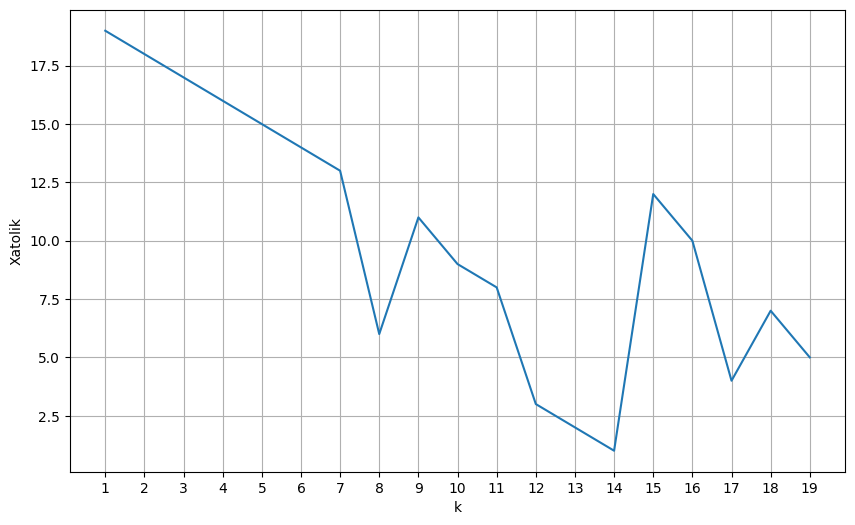

In [62]:
plt.figure(figsize=(10,6))
plt.plot(param_grid['n_neighbors'], knn_gscv.cv_results_['rank_test_score'])
plt.xticks(param_grid['n_neighbors'])
plt.xlabel('k')
plt.ylabel('Xatolik')
plt.grid()
plt.show()

#Yakuniy natija

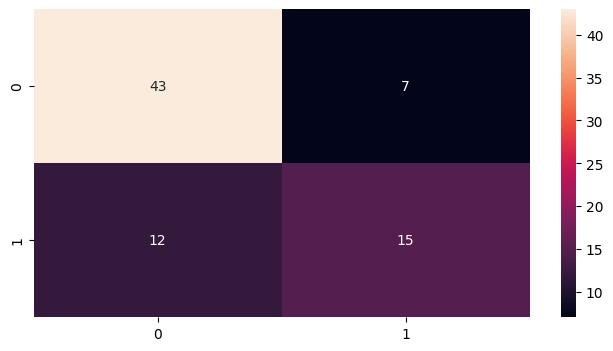

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()